Solution of 1-D Diffusion Equation
*******
*******
Libraries Imported
*******
*******
The space domain is set between 0 to: 1 m, and the simulation time is set for a t max of:  150 sec
The value of dx is: 0.05 and the value of dt is: 0.015
Check dt for stability, It should be smaller than: 0.07500000000000001
The value of F is: 0.09999999999999996 for stability of the Explicit solution to work, the value of F should be less than 0.5
The value of alpha_bc is: 0.3
(20, 10000) Shape of x (10000, 20) shape of t: (10000, 20)


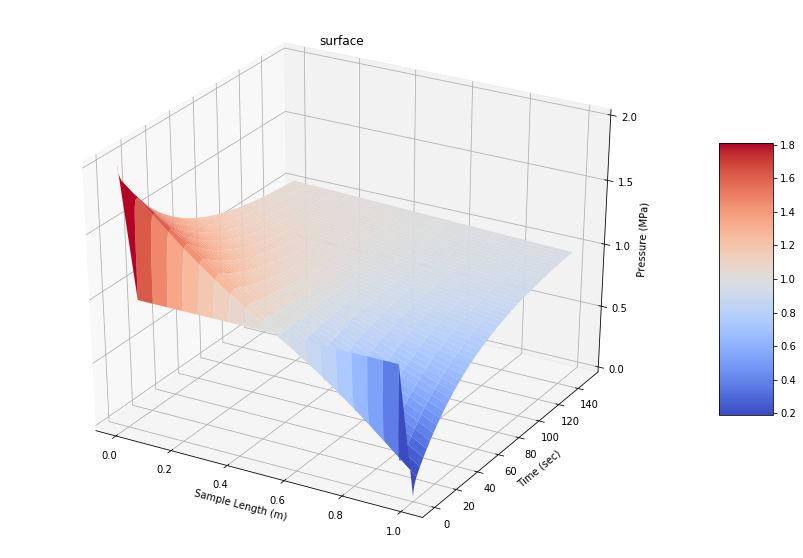

In [48]:
#------------------------------------------- Text for when the code is being run-------------------------------------------

print("Solution of 1-D Diffusion Equation")

for i in range(0,2):
    print("*******")
    
print("Libraries Imported")

#---------------------------------------------------Import libraries-------------------------------------------------------

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np
from mpl_toolkits import mplot3d
%matplotlib inline

# ---------------------------------------------------Initialize domain----------------------------------------------------

for i in range(0,2):
    print("*******")
    
x0 = 0; t0 = 0
x_max = 1; t_max=150
nx = 20; nt = 10000;pi=1
dx = (x_max-x0)/nx; dt = (t_max-t0)/nt;

print("The space domain is set between 0 to:", x_max, "m, and the simulation time is set for a t max of: ", t_max, "sec")
print("The value of dx is:",dx, "and the value of dt is:", dt)

c = 60; alpha = 1/c;

print("Check dt for stability, It should be smaller than:", 0.5*(dx**2)*c)

x = np.linspace(x0,x_max,nx)
t = np.linspace(t0,t_max,nt)

x, t = np.meshgrid(x, t)

p = np.zeros(shape=(nx,nt))
p.fill(pi)

# ----------------------------------------------------Boundary conditions--------------------------------------------------

p[0,0] = 2
p[nx-1,0]=0

# --------------------------------------------------------Constants--------------------------------------------------------
F = (dt/(dx*dx))*alpha   #constatnt (dt/dx**2 for the interior points)
alpha_bc = dt/dx   #constant (dt/dx for the boundary condition equation)

print("The value of F is:", F, "for stability of the Explicit solution to work,\
 the value of F should be less than 0.5")

print("The value of alpha_bc is:", alpha_bc)

lambda1 = 90; lambda2 = 90

# --------------------------------------------------------Testing plots---------------------------------------------------

#plt.plot(x*100,p)

# -------------------------------------------------------The main loop----------------------------------------------------
j=0;i=0
for i in range(0,nt-1):
    #print("the value of i:",i)
    p[0,i+1] = (alpha_bc/lambda1)*(p[1,i]-p[0,i])+p[0,i]
    p[nx-1,i+1] = -(alpha_bc/lambda2)*(p[nx-1,i]-p[nx-2,i])+p[nx-1,i]
    for j in range(1,nx-1):
        p[j,i+1] = ((F)*(p[j+1,i]-2*p[j,i]+p[j-1,i])+p[j,i])

        #print(p[j,i],j,i)
        #if i%40==0:
            #plt.plot(x,p[:,i], label="t={i}")
        #plt.xlabel("Length (mm)")
        #plt.ylim(0, 3)
        #plt.xlim(-.5, 80)
        #plt.ylabel("Pressure (MPa)")
            #plt.legend()
            
        #upstream pressure-------
        #plt.plot(t[i],p[3,i],"*")
    #3d plot--------here--------
print(p.shape,"Shape of x",x.shape,"shape of t:",t.shape)
#plt.plot(t,p[3,:])
fig, ax = plt.subplots(subplot_kw={"projection":"3d"},figsize=(15,10))
surf=ax.plot_surface(x, t, np.transpose(p),cmap='coolwarm', edgecolor='none')
# Customize the z axis.
ax.set_zlim(0, 2)
ax.zaxis.set_major_locator(LinearLocator(5))
# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

ax.set_xlabel('Sample Length (m)')
ax.set_ylabel('Time (sec)')
ax.set_zlabel('Pressure (MPa)')

ax.set_title('surface');

2D heat equation solver


MovieWriter stderr:
[gif @ 0000016fc3df9c00] GIF muxer supports only a single video GIF stream.
Could not write header for output file #0 (incorrect codec parameters ?): Invalid argument
Error initializing output stream 0:0 -- 



CalledProcessError: Command '['ffmpeg', '-f', 'rawvideo', '-vcodec', 'rawvideo', '-s', '432x288', '-pix_fmt', 'rgba', '-r', '1000.0', '-loglevel', 'error', '-i', 'pipe:', '-vcodec', 'h264', '-pix_fmt', 'yuv420p', '-y', 'heat_equation_solution.gif']' returned non-zero exit status 1.

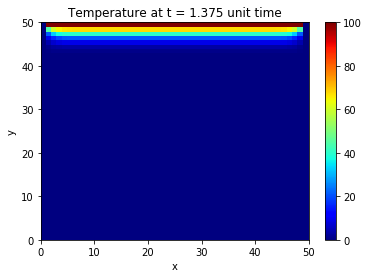

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation

print("2D heat equation solver")

plate_length = 50
max_iter_time = 750

alpha = 2
delta_x = 1

delta_t = (delta_x ** 2)/(4 * alpha)
gamma = (alpha * delta_t) / (delta_x ** 2)

# Initialize solution: the grid of u(k, i, j)
u = np.empty((max_iter_time, plate_length, plate_length))

# Initial condition everywhere inside the grid
u_initial = 0

# Boundary conditions
u_top = 100.0
u_left = 0.0
u_bottom = 0.0
u_right = 0.0

# Set the initial condition
u.fill(u_initial)

# Set the boundary conditions
u[:, (plate_length-1):, :] = u_top
u[:, :, :1] = u_left
u[:, :1, 1:] = u_bottom
u[:, :, (plate_length-1):] = u_right

def calculate(u):
    for k in range(0, max_iter_time-1, 1):
        for i in range(1, plate_length-1, delta_x):
            for j in range(1, plate_length-1, delta_x):
                u[k + 1, i, j] = gamma * (u[k][i+1][j] + u[k][i-1][j] + u[k][i][j+1] + u[k][i][j-1] - 4*u[k][i][j]) + u[k][i][j]

    return u

def plotheatmap(u_k, k):
    # Clear the current plot figure
    plt.clf()

    plt.title(f"Temperature at t = {k*delta_t:.3f} unit time")
    plt.xlabel("x")
    plt.ylabel("y")

    # This is to plot u_k (u at time-step k)
    plt.pcolormesh(u_k, cmap=plt.cm.jet, vmin=0, vmax=100)
    plt.colorbar()

    return plt

# Do the calculation here
u = calculate(u)

def animate(k):
    plotheatmap(u[k], k)

anim = animation.FuncAnimation(plt.figure(), animate, interval=1, frames=max_iter_time, repeat=False)
anim.save("heat_equation_solution.gif")

print("Done!")